# **Challenge HC LEPIC - Sprint 3 - Dynamic Programming**

**Alunos:**
• Pedro Oliveira Valotto - 551445
• Rony Ken Nagai - 551549
• Tomáz Versolato Carballo - 551417
• Lucas Laia Manentti - 97709



Exemplo 1:
Residente: Gustavo
Número de Treinos: 7
Performances: ['bom', 'excelente', 'ruim', 'bom', 'satisfatorio', 'ruim', 'satisfatorio']

Matriz de Resultados de Experiência:
Treinos \ Performance |  Excelente  |    Bom    | Satisfatório |   Ruim   
1                  |        0.0 |       5.8 |          0.0 |      0.0
2                  |       25.4 |       0.0 |          0.0 |      0.0
3                  |        0.0 |       0.0 |          0.0 |     35.6
4                  |        0.0 |      90.9 |          0.0 |      0.0
5                  |        0.0 |       0.0 |        169.4 |      0.0
6                  |        0.0 |       0.0 |          0.0 |    334.7
7                  |        0.0 |       0.0 |        673.9 |      0.0


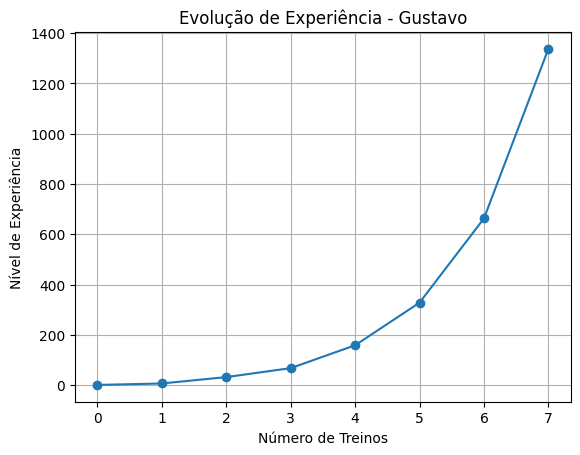



Exemplo 2:
Residente: João
Número de Treinos: 7
Performances: ['excelente', 'bom', 'ruim', 'excelente', 'satisfatorio', 'excelente', 'ruim']

Matriz de Resultados de Experiência:
Treinos \ Performance |  Excelente  |    Bom    | Satisfatório |   Ruim   
1                  |        9.2 |       5.8 |          0.0 |      0.0
2                  |       25.4 |      22.1 |          0.0 |      0.0
3                  |        0.0 |       0.0 |          0.0 |     35.7
4                  |      105.9 |      90.9 |          0.0 |      0.0
5                  |        0.0 |       0.0 |        183.2 |      0.0
6                  |      417.6 |       0.0 |          0.0 |    334.7
7                  |        0.0 |       0.0 |        673.9 |    780.8


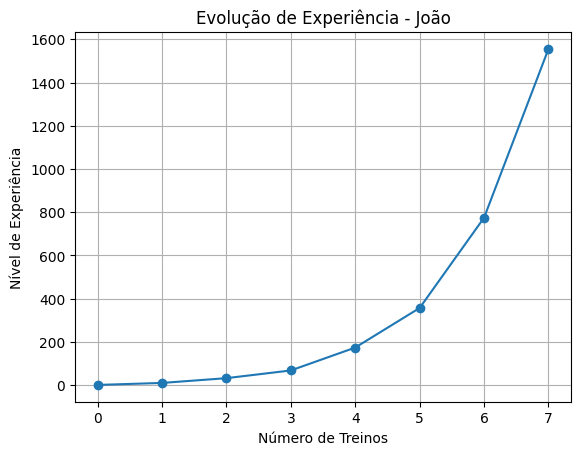



Exemplo 3:
Residente: Bruno
Número de Treinos: 7
Performances: ['bom', 'satisfatorio', 'excelente', 'bom', 'satisfatorio', 'excelente', 'bom']

Matriz de Resultados de Experiência:
Treinos \ Performance |  Excelente  |    Bom    | Satisfatório |   Ruim   
1                  |        9.2 |       5.6 |          0.0 |      0.0
2                  |       25.4 |      22.1 |         10.5 |      0.0
3                  |       52.2 |       0.0 |          0.0 |     35.7
4                  |      105.9 |      85.6 |          0.0 |      0.0
5                  |        0.0 |       0.0 |        163.5 |      0.0
6                  |      379.1 |       0.0 |          0.0 |    334.7
7                  |        0.0 |     735.6 |        673.9 |    780.8


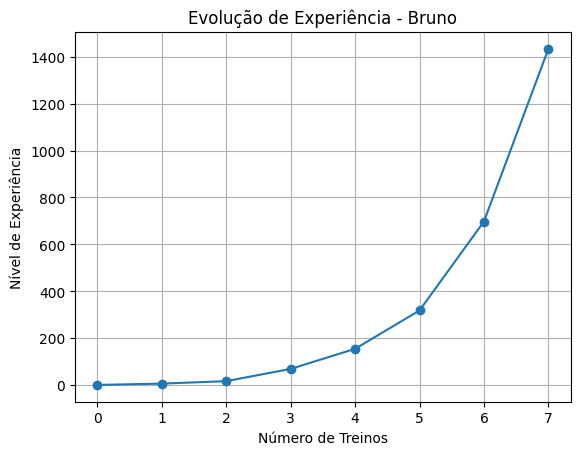



Exemplo 4:
Residente: Carlos
Número de Treinos: 8
Performances: ['bom', 'satisfatorio', 'bom', 'excelente', 'satisfatorio', 'excelente', 'bom', 'satisfatorio']

Matriz de Resultados de Experiência:
Treinos \ Performance |  Excelente  |    Bom    | Satisfatório |   Ruim   
1                  |        9.2 |       5.5 |          0.0 |      0.0
2                  |       25.4 |      22.1 |         10.5 |      0.0
3                  |       52.2 |      32.1 |          0.0 |     35.7
4                  |       95.3 |      85.6 |          0.0 |      0.0
5                  |        0.0 |       0.0 |        154.1 |      0.0
6                  |      347.9 |       0.0 |          0.0 |    334.7
7                  |        0.0 |     680.9 |        673.9 |    780.8
8                  |        0.0 |       0.0 |       1342.7 |      0.0


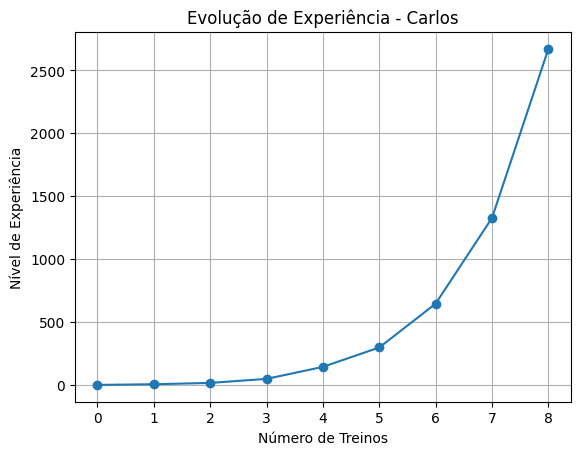



Exemplo 5:
Residente: Fernanda
Número de Treinos: 14
Performances: ['ruim', 'satisfatorio', 'bom', 'ruim', 'satisfatorio', 'bom', 'satisfatorio', 'bom', 'ruim', 'bom', 'satisfatorio', 'excelente', 'satisfatorio', 'bom']

Matriz de Resultados de Experiência:
Treinos \ Performance |  Excelente  |    Bom    | Satisfatório |   Ruim   
1                  |        9.2 |       5.5 |          0.0 |      2.1
2                  |       25.4 |      22.1 |          7.1 |      0.0
3                  |       52.2 |      23.9 |          0.0 |     35.7
4                  |       95.3 |      85.6 |          0.0 |     37.3
5                  |        0.0 |       0.0 |         80.4 |      0.0
6                  |      347.9 |     187.6 |          0.0 |    334.7
7                  |        0.0 |     680.9 |        353.5 |    780.8
8                  |        0.0 |     725.2 |       1342.7 |      0.0
9                  |        0.0 |       0.0 |          0.0 |   1426.7
10                 |        0.0 |  

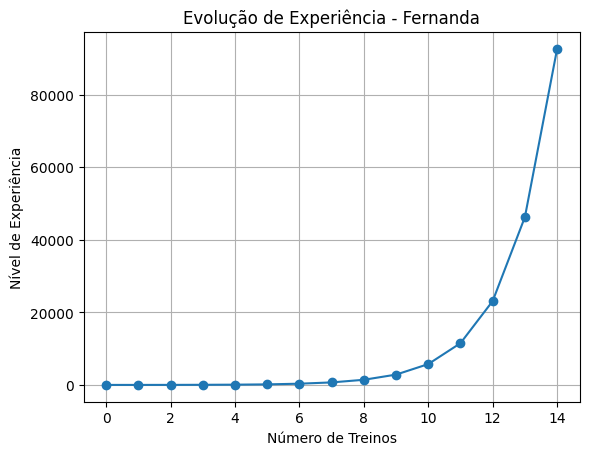

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Parâmetros
MAX_TREINOS = 20
TIPOS_PERFORMANCE = 4
matriz_resultados = np.zeros((MAX_TREINOS, TIPOS_PERFORMANCE))
performance_map = {"excelente": 0, "bom": 1, "satisfatorio": 2, "ruim": 3}
performances_possiveis = ["excelente", "bom", "satisfatorio", "ruim"]

# Banco de nomes para os residentes
nomes_residentes = [
    "Ana", "Bruno", "Carlos", "Daniela", "Eduardo", "Fernanda",
    "Gustavo", "Helena", "Isabela", "João", "Karina", "Lucas",
    "Mariana", "Natália", "Otávio", "Paula", "Rafael", "Sofia",
    "Tiago", "Verônica"
]

# Função para calcular experiência e preencher a matriz de resultados
def calcular_experiencia_matriz(treinos, performance, nivel_atual):
    indice_perf = performance_map[performance]
    # Variação na experiência gerada, mais equilibrada
    variacao = random.uniform(0.8, 1.2)  # Variação aleatória para cada treino
    if performance == "excelente":
        experiencia = 10 * treinos * variacao + nivel_atual
    elif performance == "bom":
        experiencia = 5 * treinos * variacao + nivel_atual
    elif performance == "satisfatorio":
        experiencia = 2 * treinos * variacao + nivel_atual
    else:
        experiencia = 1 * treinos * variacao + nivel_atual
    matriz_resultados[treinos-1][indice_perf] = experiencia
    return experiencia

# Função para simular a evolução do residente usando a matriz de resultados
def simular_evolucao_com_matriz(residente, treinos, performances):
    nivel_atual = 1  # Nível inicial do residente
    historico_experiencia = [nivel_atual]
    for i in range(treinos):
        performance = performances[i]
        experiencia = calcular_experiencia_matriz(i + 1, performance, nivel_atual)
        nivel_atual += experiencia
        historico_experiencia.append(nivel_atual)
    return historico_experiencia

# Função para visualizar a matriz de resultados
def visualizar_matriz():
    print("\nMatriz de Resultados de Experiência:")
    print("Treinos \\ Performance |  Excelente  |    Bom    | Satisfatório |   Ruim   ")
    for i in range(MAX_TREINOS):
        if np.any(matriz_resultados[i]):
            print(f"{i+1: <18} | {matriz_resultados[i][0]: >10.1f} | {matriz_resultados[i][1]: >9.1f} | {matriz_resultados[i][2]: >12.1f} | {matriz_resultados[i][3]: >8.1f}")

# Função para plotar a evolução do residente com base na matriz
def plotar_evolucao_com_matriz(residente, historico_experiencia):
    plt.plot(historico_experiencia, marker='o')
    plt.title(f'Evolução de Experiência - {residente}')
    plt.xlabel('Número de Treinos')
    plt.ylabel('Nível de Experiência')
    plt.grid(True)
    plt.show()

# Função para gerar performances aleatórias e diversificadas
def gerar_performances_diversificadas(treinos):
    performances = []
    # Probabilidades diferenciadas para criar mais variedade
    pesos_performances = [0.2, 0.3, 0.3, 0.2]  # Probabilidade para [excelente, bom, satisfatório, ruim]
    while len(performances) < treinos:
        nova_performance = random.choices(performances_possiveis, pesos_performances, k=1)[0]
        if len(performances) == 0 or nova_performance != performances[-1]:  # Evita repetição consecutiva
            performances.append(nova_performance)
    return performances

# Função para gerar um nome aleatório para o residente
def gerar_nome_residente():
    return random.choice(nomes_residentes)

# Gerar e plotar 5 exemplos únicos com resultados mais equilibrados
for exemplo in range(5):
    residente = gerar_nome_residente()
    treinos = random.randint(5, 15)  # Número de treinos varia de 5 a 15
    performances = gerar_performances_diversificadas(treinos)
    print(f"\n\nExemplo {exemplo + 1}:")
    print(f"Residente: {residente}")
    print(f"Número de Treinos: {treinos}")
    print(f"Performances: {performances}")

    historico = simular_evolucao_com_matriz(residente, treinos, performances)
    visualizar_matriz()
    plotar_evolucao_com_matriz(residente, historico)
